In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def disp(img, cmap='gray'):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

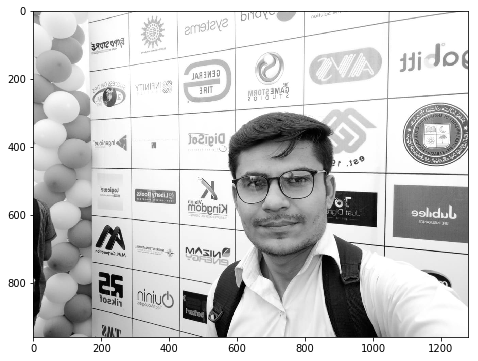

In [3]:
mine = cv2.imread('../image/mine.jpg', 0)
disp(mine)

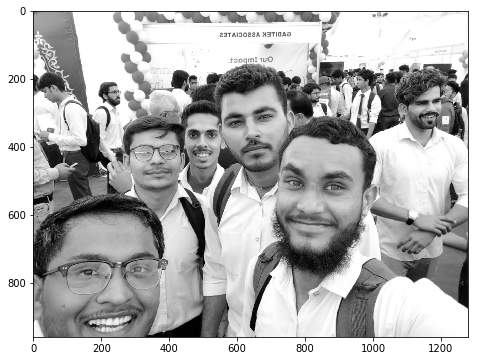

In [4]:
group = cv2.imread('../image/group.jpg', 0)
disp(group)

In [5]:
sift = cv2.__version__
sift

#!pip uninstall opencv-python
#!pip install opencv-contrib-python==3.4.2.16

'3.4.2'

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

In [7]:
kp1, des1 = sift.detectAndCompute(mine, None)
kp2, des2 = sift.detectAndCompute(group, None)

In [8]:
bf = cv2.BFMatcher()

In [9]:
matches = bf.knnMatch(des1, des2, k=2)

In [10]:
len(matches)

4264

In [11]:
good = []

# lESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH 2

for m1, m2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT
     if m1.distance < 0.75 * m2.distance:
            good.append([m1])

In [12]:
len(good)

73

In [13]:
sift_matches = cv2.drawMatchesKnn(mine, kp1, group, kp2, good, None, flags=2)

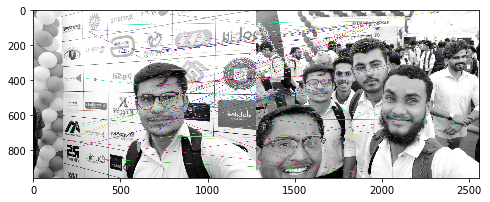

In [14]:
disp(sift_matches)